# ML-ZoomCamp : Regression

In [2]:
import pandas as pd
import numpy as np

In [4]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'

In [9]:
df = pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [11]:
df.shape

(2160, 12)

### Preparing the dataset

In [14]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

use only the following columns:
- 'ram',
- 'storage',
- 'screen',
- 'final_price'

In [17]:
# Keep only the numerical columns (for simplicity)
df = df[['ram', 'storage', 'screen', 'final_price']]

In [19]:
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


### EDA
Look at the final_price variable. Does it have a long tail?

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

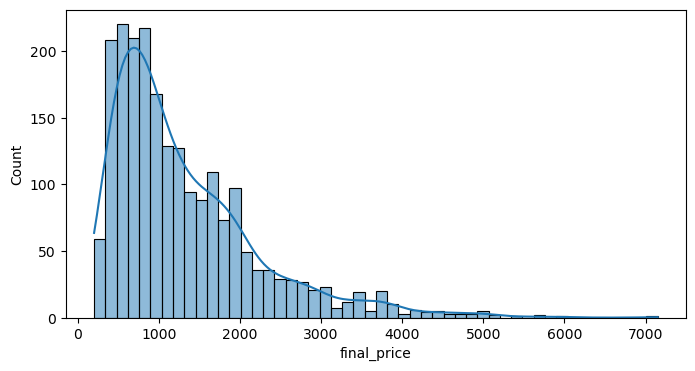

In [23]:
plt.figure(figsize=(8, 4))

sns.histplot(df.final_price, bins=50, kde=True)
plt.show()

### Question 1
There's one column with missing values. What is it?

In [29]:
df.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

### Question 2
What's the median (50% percentile) for variable 'ram'?

In [32]:
ram_median = df['ram'].median()
print(f' Median (50th Percentile) of RAM: {ram_median} GB')

 Median (50th Percentile) of RAM: 16.0 GB


### Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [35]:
np.random.seed(42)
idx = np.arange(len(df))
np.random.shuffle(idx)

In [37]:
df_shuffled = df.iloc[idx].reset_index(drop=True)

In [39]:
n = len(df_shuffled)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [41]:
df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train : n_train + n_val]
df_test = df_shuffled.iloc[n_train + n_val:]

In [43]:
# Print the shapes of the splits to verify
print(f"Training set size: {df_train.shape}")
print(f"Validation set size: {df_val.shape}")
print(f"Test set size: {df_test.shape}")

Training set size: (1296, 4)
Validation set size: (432, 4)
Test set size: (432, 4)


In [45]:
X_train = df_train.drop(columns='final_price')
X_val = df_val.drop(columns='final_price')
X_test = df_test.drop(columns='final_price')

In [47]:
y_train = df_train['final_price']
y_val = df_val['final_price']
y_test = df_test['final_price']

In [49]:
len(X_train)

1296

### Linear Regression

### Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)

In [53]:
# Option 1: Fill missing values with 0
X_train_0 = X_train.fillna(0)
X_val_0 = X_val.fillna(0)
X_test_0 = X_test.fillna(0)

In [55]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
# Train the model
model_0 = LinearRegression()
model_0.fit(X_train_0, y_train)

# Predict and evaluate on validation set
y_pred_0 = model_0.predict(X_val_0)
rmse_0 = np.sqrt(mean_squared_error(y_val, y_pred_0))
print(f"RMSE (Fill with 0): {round(rmse_0, 2)}")

RMSE (Fill with 0): 597.36


In [59]:
# Option 2: Fill missing values with the mean (computed from training set)
mean_final_price = X_train.mean()
X_train_mean = X_train.fillna(mean_final_price)
X_val_mean = X_val.fillna(mean_final_price)

# Train the model
model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train)

# Predict and evaluate on validation set
y_pred_mean = model_mean.predict(X_val_mean)
rmse_mean = np.sqrt(mean_squared_error(y_val, y_pred_mean))
print(f"RMSE (Fill with mean): {round(rmse_mean, 2)}")

RMSE (Fill with mean): 600.27


In [61]:
# Compare both RMSEs
if rmse_mean < rmse_0:
    print("Filling with mean gives a better RMSE.")
else:
    print("Filling with 0 gives a better RMSE.")

Filling with 0 gives a better RMSE.


### Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.

In [64]:
# List of regularization strengths (r values)
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Train and evaluate Ridge regression models for each r
best_r = None
best_rmse = float('inf')

for r in r_values:
    # Train Ridge regression model
    model = Ridge(alpha=r)
    model.fit(X_train_0, y_train)

    # Predict on validation set
    y_pred = model.predict(X_val_0)

    # Calculate RMSE
    score = rmse(y_val, y_pred)
    print(f"RMSE for r={r}: {round(score, 2)}")

    # Check if this is the best RMSE
    if score < best_rmse:
        best_rmse = score
        best_r = r

# Print the best result
print(f"\nBest r: {best_r}, with RMSE: {round(best_rmse, 2)}")

RMSE for r=0: 597.36
RMSE for r=0.01: 597.36
RMSE for r=0.1: 597.36
RMSE for r=1: 597.36
RMSE for r=5: 597.36
RMSE for r=10: 597.36
RMSE for r=100: 597.34

Best r: 100, with RMSE: 597.34


In [66]:
# List of seeds to test
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# List to store the RMSE scores
rmse_scores = []

# Iterate over each seed
for seed in seeds:
    # Set seed for splitting
    np.random.seed(seed)
    idx = np.arange(len(df))
    np.random.shuffle(idx)
    df_filtered = df.iloc[idx].reset_index(drop=True)

    # Split the data into train/validation/test (60%/20%/20%)
    n = len(df_filtered)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    df_train = df.iloc[:n_train]
    df_val = df.iloc[n_train:n_train + n_val]
    df_test = df.iloc[n_train + n_val:]

    # Separate the target variable (Final Price)
    X_train = df_train.drop(columns='final_price')
    y_train = df_train['final_price']
    X_val = df_val.drop(columns='final_price')
    y_val = df_val['final_price']

    # Fill missing values with 0
    X_train = X_train.fillna(0)
    X_val = X_val.fillna(0)

    # Train Ridge regression model without regularization (alpha=0)
    model = Ridge(alpha=0)
    model.fit(X_train, y_train)

    # Predict on validation set
    y_pred = model.predict(X_val)

    # Calculate RMSE and store the score
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

# Calculate the standard deviation of RMSE scores
std_rmse = np.std(rmse_scores)

# Print the RMSE scores and their standard deviation
print("RMSE scores for different seeds:", [round(score, 2) for score in rmse_scores])
print(f"Standard deviation of RMSE: {round(std_rmse, 3)}")

RMSE scores for different seeds: [734.72, 734.72, 734.72, 734.72, 734.72, 734.72, 734.72, 734.72, 734.72, 734.72]
Standard deviation of RMSE: 0.0


In [68]:
# Set the seed for reproducibility
seed = 9
np.random.seed(seed)

# Shuffle and split the data
idx = np.arange(len(df_filtered))
np.random.shuffle(idx)
df_filtered = df_filtered.iloc[idx].reset_index(drop=True)

# Split the data into train/validation/test (60%/20%/20%)
n = len(df_filtered)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

df_train = df_filtered.iloc[:n_train]
df_val = df_filtered.iloc[n_train:n_train + n_val]
df_test = df_filtered.iloc[n_train + n_val:]

# Combine train and validation datasets
df_combined = pd.concat([df_train, df_val])

# Separate the target variable (Final Price)
X_train_val = df_combined.drop(columns='final_price')
y_train_val = df_combined['final_price']

# Fill missing values with 0
X_train_val = X_train_val.fillna(0)
X_test = df_test.drop(columns='final_price').fillna(0)
y_test = df_test['final_price']

# Train Ridge regression model with r=0.001
model = Ridge(alpha=0.001)
model.fit(X_train_val, y_train_val)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate RMSE on the test dataset
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE result
print(f"RMSE on the test dataset: {round(test_rmse, 2)}")

RMSE on the test dataset: 599.61
